IMAGE CLASSIFICATION MODELS ON FISH AND TIGER CLASSES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import skimage.filters
from google.colab.patches import cv2_imshow
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SIZE = 256

#Capture training data and labels into respective lists
images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/ML_imaging/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img.flatten())
        labels.append(label)

Tiger
Fish


In [ ]:
print('Fish receords: ', labels.count('Fish'))
print('Tiger receords: ', labels.count('Tiger'))

Fish receords:  738
Tiger receords:  455


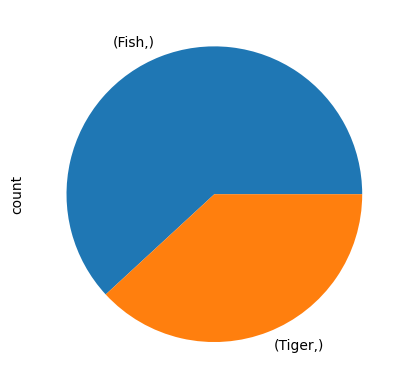

In [ ]:
import pandas as pd

labels_df = pd.DataFrame(labels)

labels_df.value_counts(sort=False).plot.pie()
plt.show()

In [ ]:
images = np.array(images)
type(labels)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

labelencoder.fit(labels)
enc_labels = labelencoder.transform(labels)

In [ ]:
print(enc_labels[0], ':', labels[0], '\n')
print(enc_labels[500], ':', labels[500])

1 : Tiger 

0 : Fish


In [ ]:
print(images.shape)
print(enc_labels.shape)

(1193, 65536)
(1193,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (images, enc_labels, test_size = 0.2, random_state = 1)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(954, 65536)
(239, 65536)
(954,)
(239,)


# **PCA and KNN**

Text(0, 0.5, 'Cumulated variance')

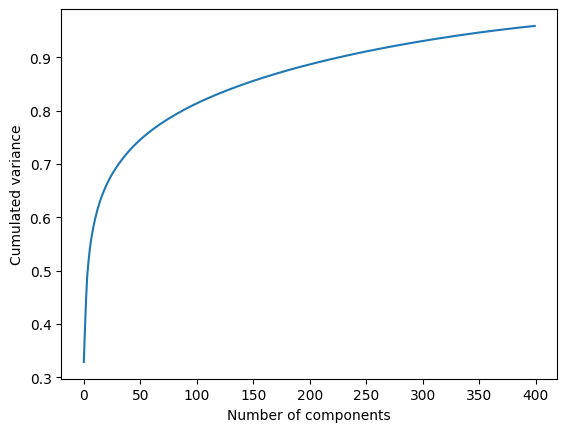

In [66]:
from sklearn.decomposition import PCA

n_components = 400
pca_tr = PCA(n_components=n_components)

X_train_pca = pca_tr.fit_transform(X_train)
X_test_pca = pca_tr.transform(X_test)

plt.plot(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulated variance")
#Explained Variance Ratio
#Show how much variance is explained by each principal component.

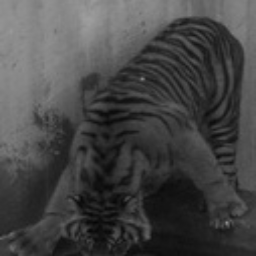

In [ ]:
test1 = X_train[364].reshape(SIZE, SIZE)
cv2_imshow(test1)

(-0.5, 255.5, 255.5, -0.5)

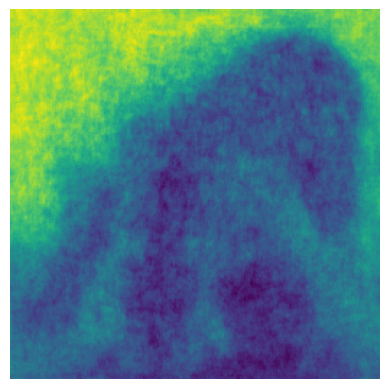

In [67]:
k = 364
res = np.zeros((SIZE*SIZE))
for i in range(n_components):
  res += pca_tr.components_[i].dot(X_train_pca[k,i])

plt.imshow(res.reshape(SIZE, SIZE))
plt.axis('off')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pca = KNeighborsClassifier(n_neighbors = 7)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

knn_pca_accuracy = accuracy_score(y_test, y_pred_pca)
print("accuracy for knn {}%".format(round(knn_pca_accuracy*100,2)), '\n\n')

print('train score: ', knn_pca.score(X_train_pca, y_train))
print('test score: ', knn_pca.score(X_test_pca, y_test))

accuracy for knn 61.92% 


train score:  0.6194968553459119
test score:  0.6192468619246861


# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy for dt 68.2% 


              precision    recall  f1-score   support

           0       0.75      0.74      0.74       148
           1       0.58      0.59      0.59        91

    accuracy                           0.68       239
   macro avg       0.66      0.66      0.66       239
weighted avg       0.68      0.68      0.68       239
 


train score:  1.0
test score:  0.6820083682008368



confusion matrix: 



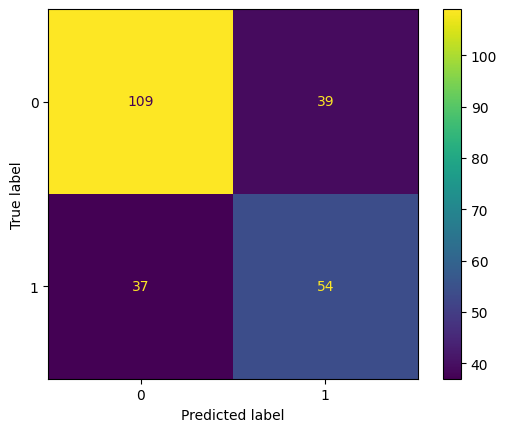

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("accuracy for dt {}%".format(round(dt_accuracy*100,2)), '\n\n')

dt_report = classification_report(y_test, y_pred_dt)
print(dt_report, '\n\n')

print('train score: ', dt.score((X_train), y_train))
print('test score: ', dt.score((X_test), y_test))
print('\n\n')

print('confusion matrix: \n')
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_disp = ConfusionMatrixDisplay(dt_cm)
dt_disp.plot()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=9, random_state=0)
RF = RF.fit((X_train), y_train)
y_pred_rf = RF.predict((X_test))

accuracy for rf 72.38%
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       148
           1       0.72      0.45      0.55        91

    accuracy                           0.72       239
   macro avg       0.72      0.67      0.68       239
weighted avg       0.72      0.72      0.71       239
 


train score:  0.9811320754716981
test score:  0.7238493723849372



confusion matrix: 



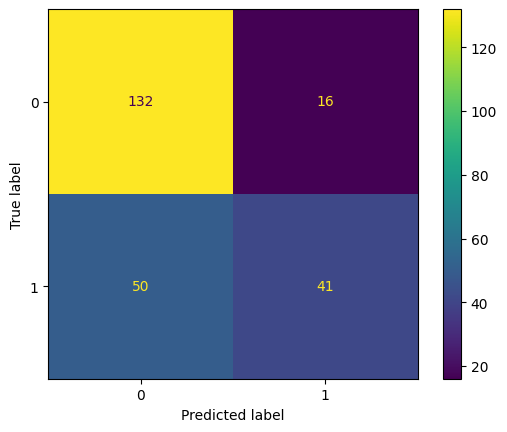

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("accuracy for rf {}%".format(round(rf_accuracy*100,2)))

RF_report = classification_report(y_test, y_pred_rf)
print(RF_report, '\n\n')

print('train score: ', RF.score((X_train), y_train))
print('test score: ',RF.score((X_test), y_test))
print('\n\n')

print('confusion matrix: \n')
RF_cm = confusion_matrix(y_test, y_pred_rf)
RF_disp=ConfusionMatrixDisplay(RF_cm)
RF_disp.plot()

# **SGD**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=450)

sgd_clf.fit(X_train, y_train)

y_pred_SGD = sgd_clf.predict(X_test)

accuracy for sgd 66.53% 


              precision    recall  f1-score   support

           0       0.68      0.87      0.76       148
           1       0.61      0.33      0.43        91

    accuracy                           0.67       239
   macro avg       0.65      0.60      0.60       239
weighted avg       0.65      0.67      0.64       239
 


train score:  0.9779874213836478
test score:  0.6652719665271967



confusion matrix: 



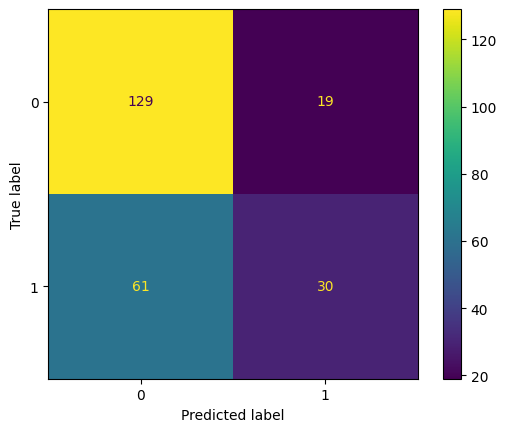

In [ ]:
from sklearn.metrics import accuracy_score

SGD_accuracy = accuracy_score(y_test, y_pred_SGD)
print("accuracy for sgd {}%".format(round(SGD_accuracy*100,2)), '\n\n')

sgd_clf_report = classification_report(y_test, y_pred_SGD)
print(sgd_clf_report, '\n\n')

print('train score: ', sgd_clf.score((X_train), y_train))
print('test score: ', sgd_clf.score((X_test), y_test))
print('\n\n')

print('confusion matrix: \n')
sgd_clf_cm = confusion_matrix(y_test, y_pred_SGD)
sgd_clf_disp=ConfusionMatrixDisplay(sgd_clf_cm)
sgd_clf_disp.plot()

# **ORIGINAL IDEA**



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

accuracy for svm 75.31% 


              precision    recall  f1-score   support

           0       0.78      0.83      0.81       148
           1       0.70      0.63      0.66        91

    accuracy                           0.75       239
   macro avg       0.74      0.73      0.73       239
weighted avg       0.75      0.75      0.75       239
 


train score:  0.9559748427672956
test score:  0.7531380753138075



confusion matrix: 



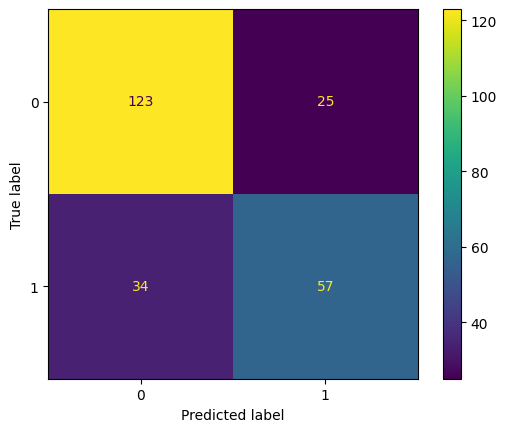

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

svm_accuracy = accuracy_score(y_test,y_pred_svm)
print("accuracy for svm {}%".format(round(svm_accuracy*100,2)), '\n\n')

svm_clf_report = classification_report(y_test, y_pred_svm)
print(svm_clf_report, '\n\n')

print('train score: ', svm_clf.score((X_train), y_train))
print('test score: ', svm_clf.score((X_test), y_test))
print('\n\n')

print('confusion matrix: \n')
svm_clf_cm = confusion_matrix(y_test, y_pred_svm)
svm_clf_disp=ConfusionMatrixDisplay(svm_clf_cm)
svm_clf_disp.plot()

# **MLP**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
MLP_model = keras.Sequential([
    keras.layers.Dense(512, input_dim=(X_train_pca.shape[1]), activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_initializer='normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
MLP_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         461,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625,665 (2.39 MB)

 Trainable params: 625,665 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
MLP_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
mc = ModelCheckpoint('best_model_MLP_img.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
MLP_history = MLP_model.fit(X_train_pca, y_train, batch_size=10, epochs=40, validation_split=0.2, verbose=1, callbacks=[es, mc])

Epoch 1/40
73/77 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5464 - loss: 146.3195 - mae: 0.4553
Epoch 1: val_loss improved from inf to 97.13972, saving model to best_model_MLP_img.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5473 - loss: 145.3591 - mae: 0.4543 - val_accuracy: 0.4974 - val_loss: 97.1397 - val_mae: 0.5026
Epoch 2/40
71/77 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6461 - loss: 86.8711 - mae: 0.3534
Epoch 2: val_loss improved from 97.13972 to 19.55132, saving model to best_model_MLP_img.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6447 - loss: 85.7239 - mae: 0.3548 - val_accuracy: 0.6754 - val_loss: 19.5513 - val_mae: 0.3236
Epoch 3/40
74/77 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6568 - loss: 46.4936 - mae: 0.3427
Epoch 3: val_loss improved from 19.55132 to 13.95959, saving model to best_model_MLP_img.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6562 - loss: 46.4513 - mae: 0.3433 - val_accuracy: 0.6545 - val_loss

In [ ]:
MLP_best_model = keras.models.load_model('best_model_MLP_img.keras')

In [ ]:
mse, mae, MLP_accuracy = MLP_best_model.evaluate(X_test_pca, y_test, verbose=0)

print('Mean absolute error: %.4f' % mae)
print('Mean squared error: %.4f' % mse)
print("accuracy for MLP {}%".format(round(MLP_accuracy*100,2)))

Mean absolute error: 0.3001
Mean squared error: 0.8066
accuracy for MLP 71.13%


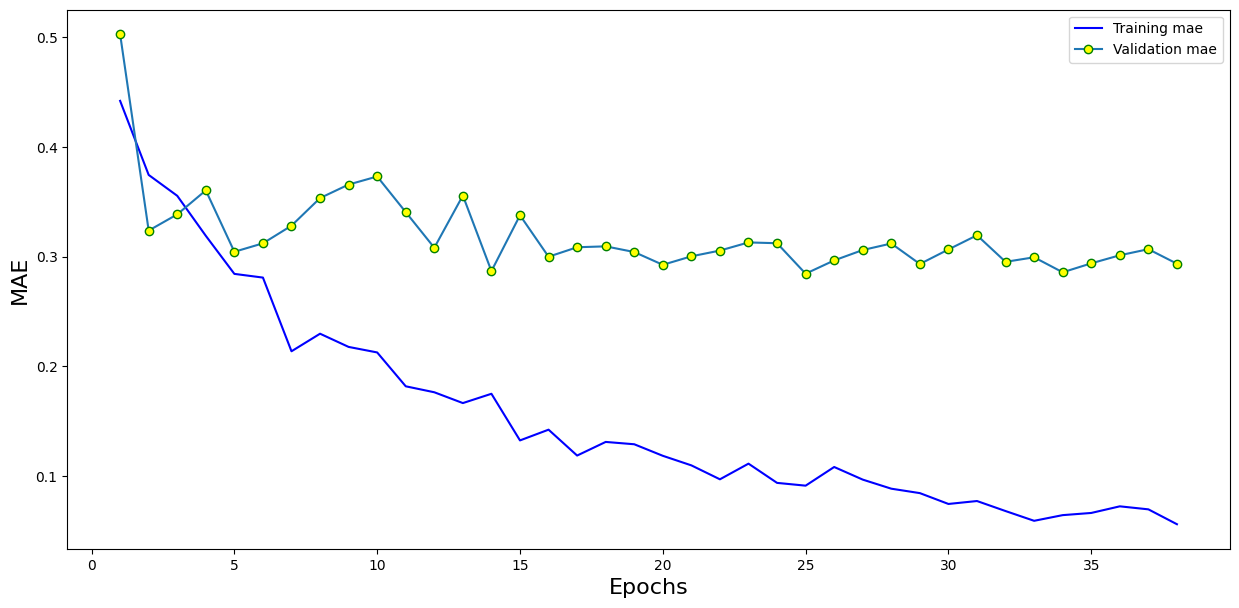

In [ ]:
MLP_history_dict = MLP_history.history

MLP_mae_values = MLP_history_dict['mae']
MLP_val_mae_values = MLP_history_dict['val_mae']
epochs = range(1, len(MLP_mae_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, MLP_mae_values, 'b', label='Training mae')
plt.plot(epochs, MLP_val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation mae')
plt.xlabel('Epochs', size=16)
plt.ylabel('MAE', size=16)
plt.legend()
plt.show()

# **CNN using Tensorflow**

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import pathlib
import glob

data_dir = pathlib.Path('/content/drive/MyDrive/ML_imaging/').with_suffix('')

In [ ]:
batch_size = 20
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.2,
  subset="training",
  seed=49,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.2,
  subset="validation",
  seed=49,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 1193 files belonging to 2 classes.
Using 955 files for training.
Found 1193 files belonging to 2 classes.
Using 238 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Fish', 'Tiger']


In [ ]:
CNN_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./256),
  tf.keras.layers.Conv2D(10, 7, activation='relu'),
  tf.keras.layers.MaxPooling2D(4),
  tf.keras.layers.Conv2D(10, 7, activation='relu'),
  tf.keras.layers.MaxPooling2D(4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
CNN_model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
  )

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)
mc = ModelCheckpoint('best_model_CNN_img.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
CNN_history = CNN_model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[es, mc], verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6497 - loss: 0.5827
Epoch 1: val_loss improved from inf to 0.47544, saving model to best_model_CNN_img.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6508 - loss: 0.5813 - val_accuracy: 0.6933 - val_loss: 0.4754
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7613 - loss: 0.4371
Epoch 2: val_loss improved from 0.47544 to 0.39404, saving model to best_model_CNN_img.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7618 - loss: 0.4368 - val_accuracy: 0.7731 - val_loss: 0.3940
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7901 - loss: 0.3952
Epoch 3: val_loss improved from 0.39404 to 0.36812, saving model to best_model_CNN_img.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7903 - loss: 0.3952 - val_accuracy: 0.7773 - val_loss: 0.3681
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8176 - loss: 0.3702
Epoch 4: val_loss did not improve from 0.36812
48/48 ━━━━

In [ ]:
CNN_best_model = keras.models.load_model('best_model_CNN_img.keras')

In [ ]:
loss, CNN_accuracy = CNN_best_model.evaluate(val_ds, verbose=1)
print("Loss: %.4f " % (loss))
print("Accuracy: %.4f " % (CNN_accuracy))

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 796ms/step - accuracy: 0.8538 - loss: 0.2680
Loss: 0.2954 
Accuracy: 0.8613 


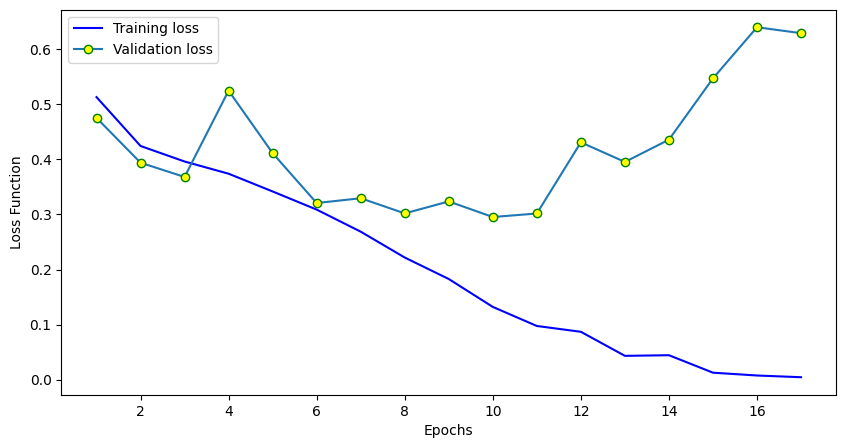

In [ ]:
CNN_history_dict = CNN_history.history

CNN_loss_function_values = CNN_history_dict['loss']
CNN_val_loss_function_values = CNN_history_dict['val_loss']
epochs = range(1, len(CNN_loss_function_values) + 1)

plt.figure(num=1, figsize=(10,5))
plt.plot(epochs, CNN_loss_function_values, 'b', label='Training loss')
plt.plot(epochs, CNN_val_loss_function_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.legend()
plt.show()

# **PRE TRAINED NETWORK using TENSORFLOW**

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('vertical'),
  tf.keras.layers.RandomRotation(0.1, fill_mode='constant')
])

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
IMG_SHAPE = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.trainable = False

<ipython-input-48-dee04403c5bc>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = rescale(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
pre_trained_model = tf.keras.Model(inputs, outputs)

In [ ]:
pre_trained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
pre_trained_model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
pre_loss, pre_accuracy = pre_trained_model.evaluate(val_ds)
print("initial loss: {:.2f}".format(pre_loss))
print("initial accuracy: {:.2f}".format(pre_accuracy))

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6469 - loss: 0.6149
initial loss: 0.62
initial accuracy: 0.63


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
mc = ModelCheckpoint('best_pre_trained_model_img.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
pre_trained_history = pre_trained_model.fit(train_ds, validation_data=val_ds, epochs=15, callbacks=[es, mc], verbose=1)

Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9852 - loss: 0.0458
Epoch 1: val_loss improved from inf to 0.02134, saving model to best_pre_trained_model_img.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9852 - loss: 0.0458 - val_accuracy: 0.9958 - val_loss: 0.0213
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9888 - loss: 0.0352
Epoch 2: val_loss improved from 0.02134 to 0.01841, saving model to best_pre_trained_model_img.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9958 - val_loss: 0.0184
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9745 - loss: 0.0726
Epoch 3: val_loss did not improve from 0.01841
48/48 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9746 - loss: 0.0720 - val_accuracy: 0.9958 - val_loss: 0.0188
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9933 - loss: 0.0279
Epoch 4: val_loss improved from 0.01841 to 0.01776, saving model to best_pr

In [ ]:
pre_trained_best_model = keras.models.load_model('best_pre_trained_model_img.keras')

In [ ]:
loss, pre_trained_accuracy = pre_trained_best_model.evaluate(val_ds, verbose=1)
print("Loss: %.4f " % (loss))
print("Accuracy: %.4f " % (pre_trained_accuracy))

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9965 - loss: 0.0109
Loss: 0.0130 
Accuracy: 0.9958 


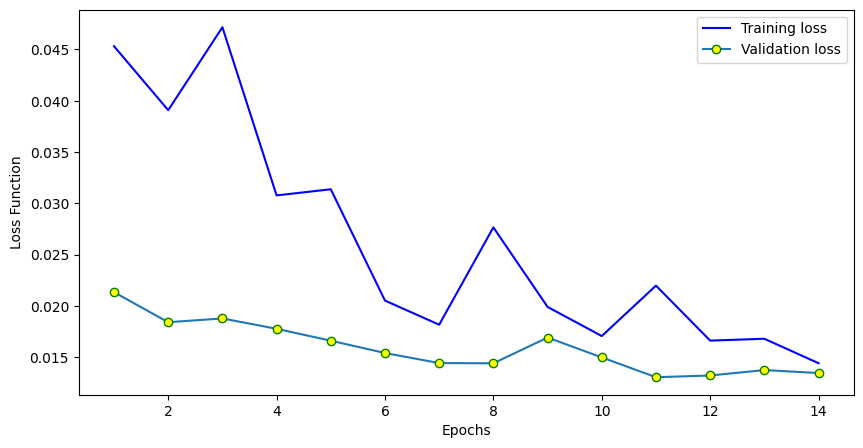

In [ ]:
pre_trained_dict=pre_trained_history.history

pre_trained_loss_function_values = pre_trained_dict['loss']
pre_trained_val_loss_function_values = pre_trained_dict['val_loss']
epochs = range(1, len(pre_trained_loss_function_values) + 1)

plt.figure(num=1, figsize=(10,5))
plt.plot(epochs, pre_trained_loss_function_values, 'b', label='Training loss')
plt.plot(epochs, pre_trained_val_loss_function_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.legend()
plt.show()

# **ACCURACIES COMPARISON GRAPH**

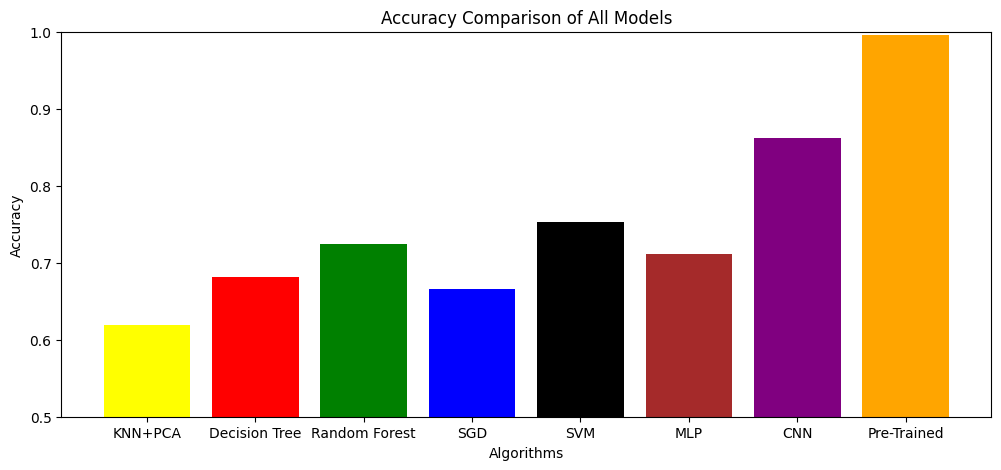

In [ ]:
algs_labels = ['KNN+PCA', 'Decision Tree', 'Random Forest', 'SGD', 'SVM', 'MLP', 'CNN', 'Pre-Trained']
accuracies = [knn_pca_accuracy, dt_accuracy, rf_accuracy, SGD_accuracy, svm_accuracy, MLP_accuracy, CNN_accuracy, pre_trained_accuracy]

plt.figure(figsize=(12, 5))
plt.bar(algs_labels, accuracies, color=['yellow', 'red', 'green','blue', 'black', 'brown', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.title('Accuracy Comparison of All Models')
plt.show()